### Load the data from the experiments

In [20]:
from s3ts.analysis import load_folder
from pathlib import Path

df = load_folder(Path("storage/synced"))
df.head()

0 duplicate entries removed
2177 total entries


mode arch    dataset  pretrain_mode  window_length  stride_series  \
0   df  cnn  ArrowHead          False             10          False   
1   df  cnn  ArrowHead          False             10          False   
2   df  cnn  ArrowHead          False             10          False   
3   df  cnn  ArrowHead          False             10          False   
4   df  cnn  ArrowHead          False             10          False   

   window_time_stride  window_patt_stride  train_exc_limit  pretrained  ...  \
0                 1.0                 1.0             32.0       False  ...   
1                 1.0                 1.0             32.0       False  ...   
2                 1.0                 1.0             32.0       False  ...   
3                 1.0                 1.0             32.0       False  ...   
4                 1.0                 1.0             32.0       False  ...   

   train_event_mult  nevents_test  nevents_train_lim  nevents_train_tot  \
0               4.0         200.0              384.0              384.0   
1               4.0         200.0              384.0              384.0   
2               4.0         200.0              384.0              384.0   
3               4.0         200.0              384.0              384.0   
4               4.0         200.0              384.0              384.0   

      time_dm    time_train    time_total val_mse  val_r2  eq_wdw_length  
0   68.982387  30569.601099  30638.583486     NaN     NaN           10.0  
1   83.244409  31746.921849  31830.166258     NaN     NaN           10.0  
2   71.123601  35739.750665  35810.874266     NaN     NaN           10.0  
3  100.135603  37059.353541  37159.489144     NaN     NaN           10.0  
4   57.307215  17048.680783  17105.987998     NaN     NaN           10.0  

[5 rows x 39 columns]

### Results Table

In [22]:
df["mode"].unique()

array(['df', 'gf', 'ts'], dtype=object)

In [30]:
import numpy as np

data = df[df["pretrain_mode"] == False].copy()
data = data[
    np.logical_or(data["arch"] == "nn",
        np.logical_or(
            np.logical_and(data["window_length"] == 70, data["mode"] == "ts"),
            np.logical_and(np.logical_and(data["window_length"] == 10, data["window_time_stride"] == 7), data["window_patt_stride"] == 1)
        )
    )
]

def method(row):
    string = row["mode"].upper() + "-" +  row["arch"].upper() 
    if row["pretrained"]:
        if row["stride_series"]:
            string += "-B"
        else:
            string += "-A"
    return string

data["method"] = data[["arch", "mode", "pretrained", "stride_series"]].apply(method, axis=1)
data["method"].unique()

data.groupby(["method", "dataset"])["test_acc"].mean().unstack()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
from s3ts.analysis import results_table
results_table(df)

### Time Dilation Figure

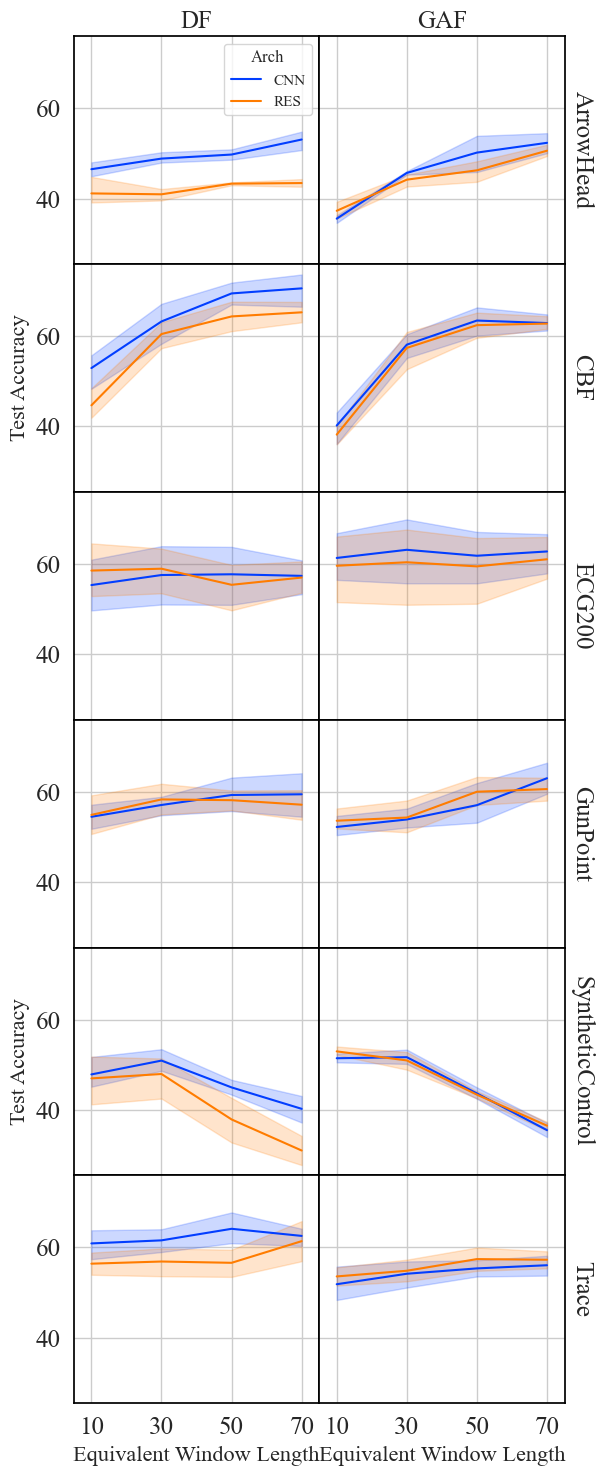

In [6]:
from s3ts.analysis import timedil_figure
timedil_figure(df)

### Self-Supervised Pretrain Figure

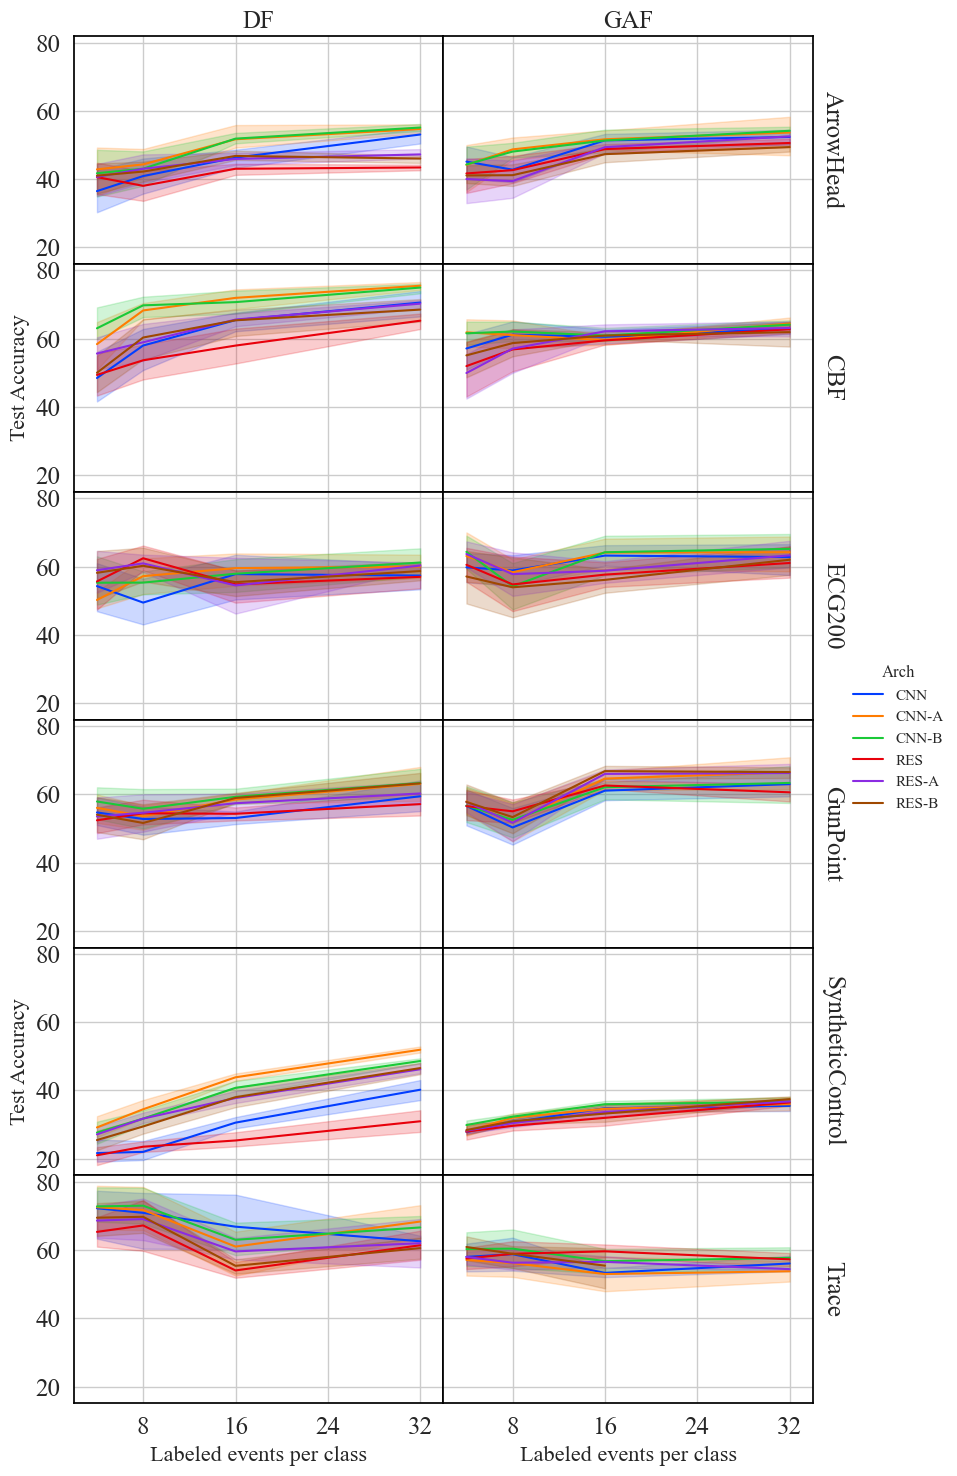

In [7]:
from s3ts.analysis import pretrain_figure
pretrain_figure(df)

### Dataset Encoding Figures

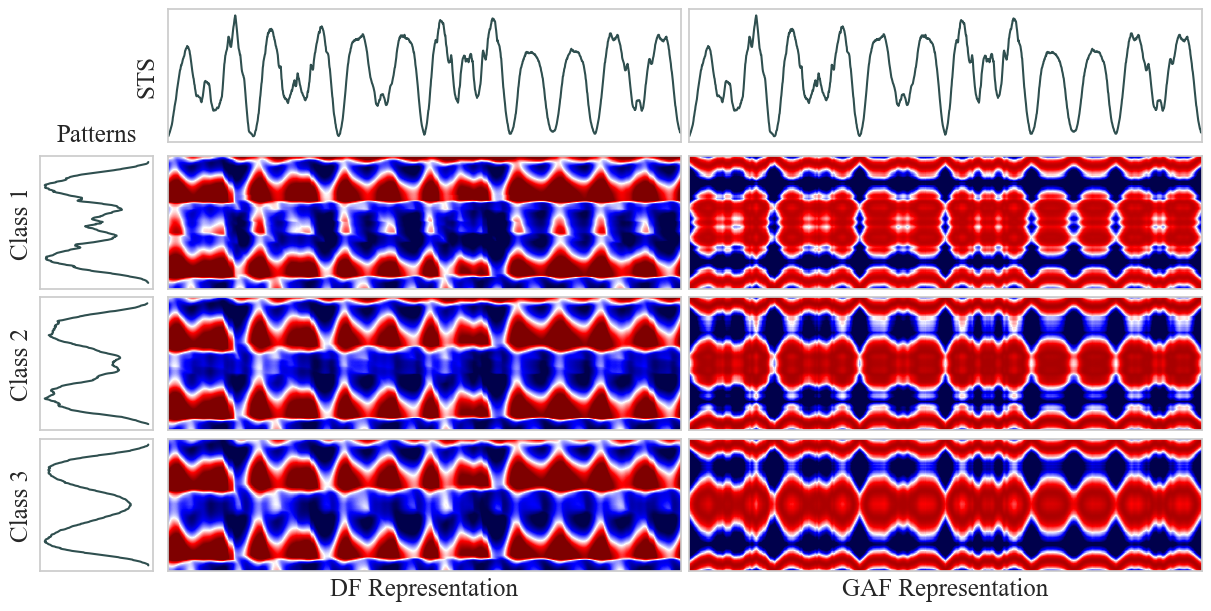

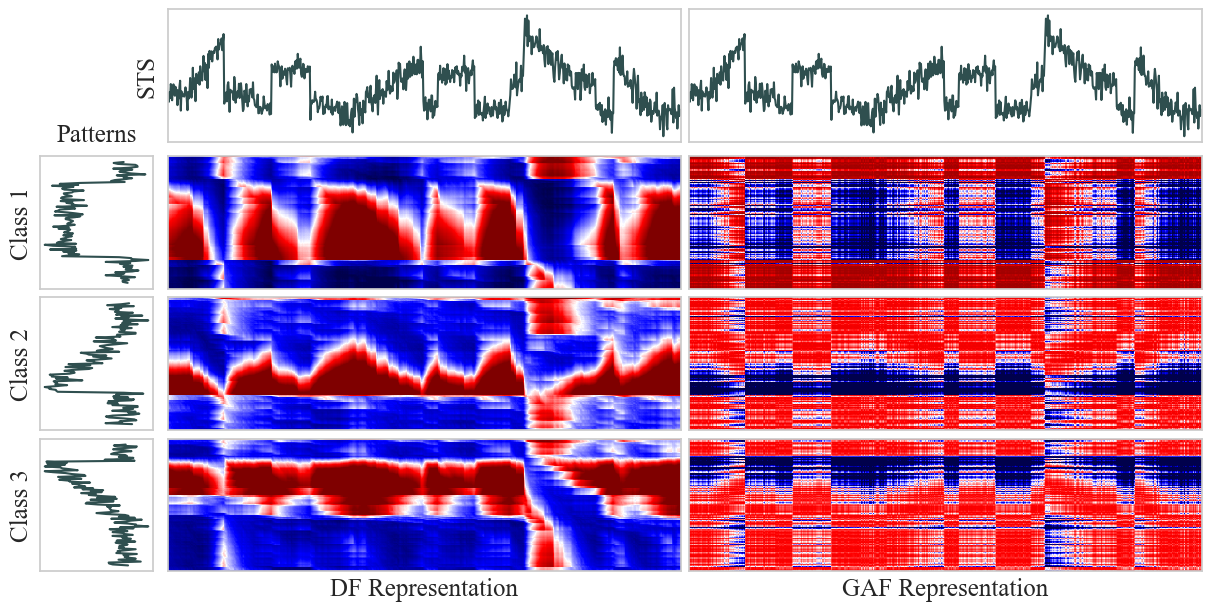

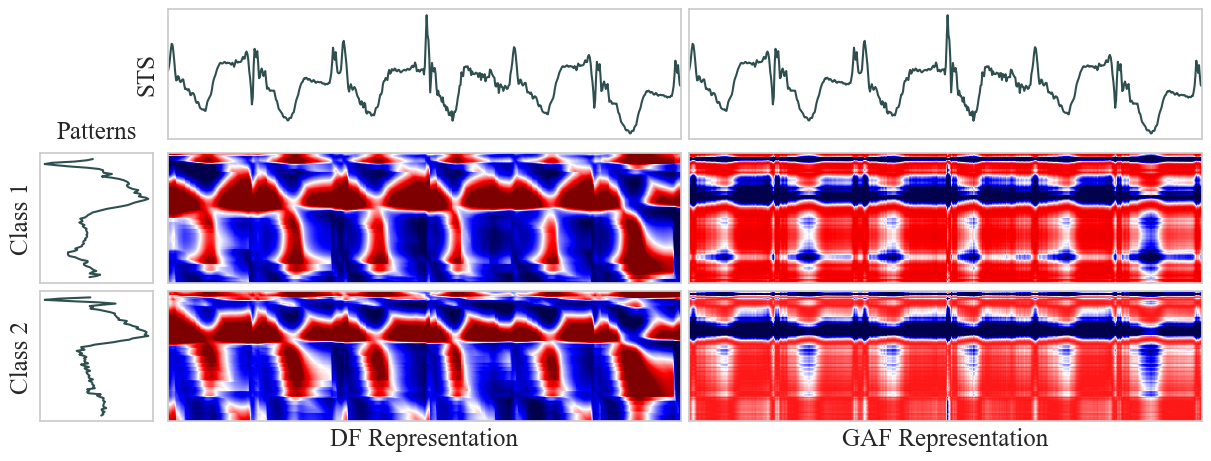

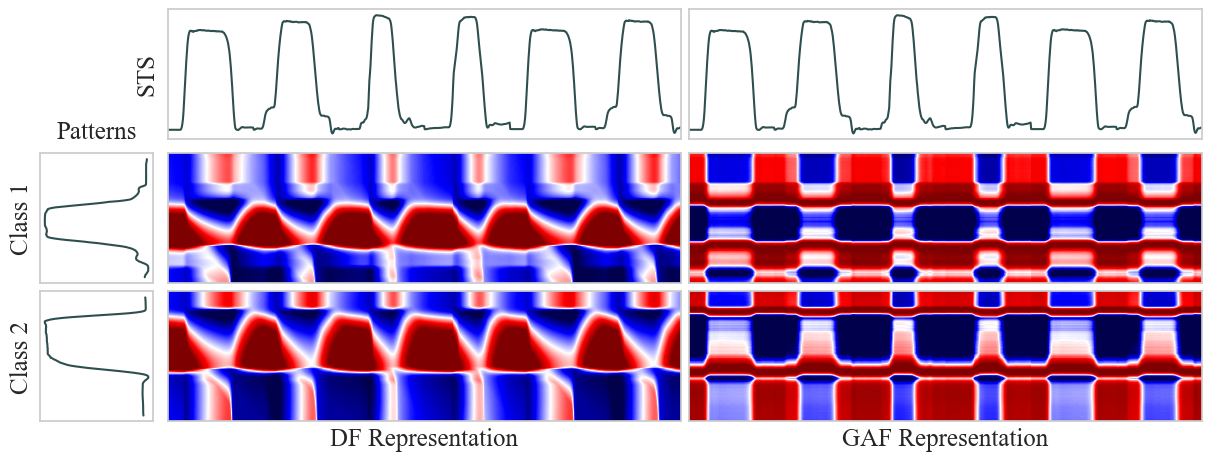

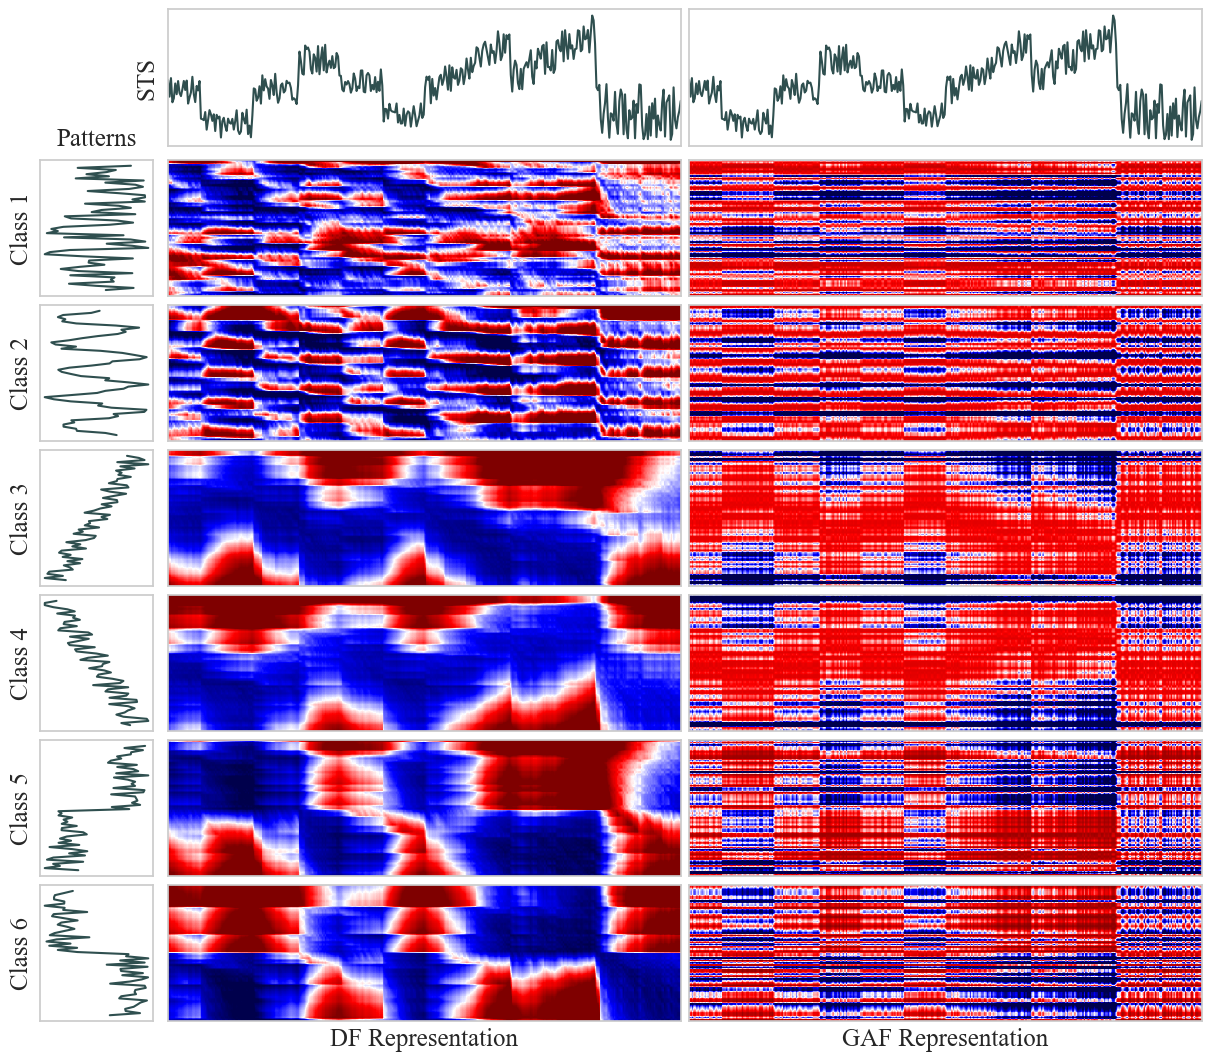

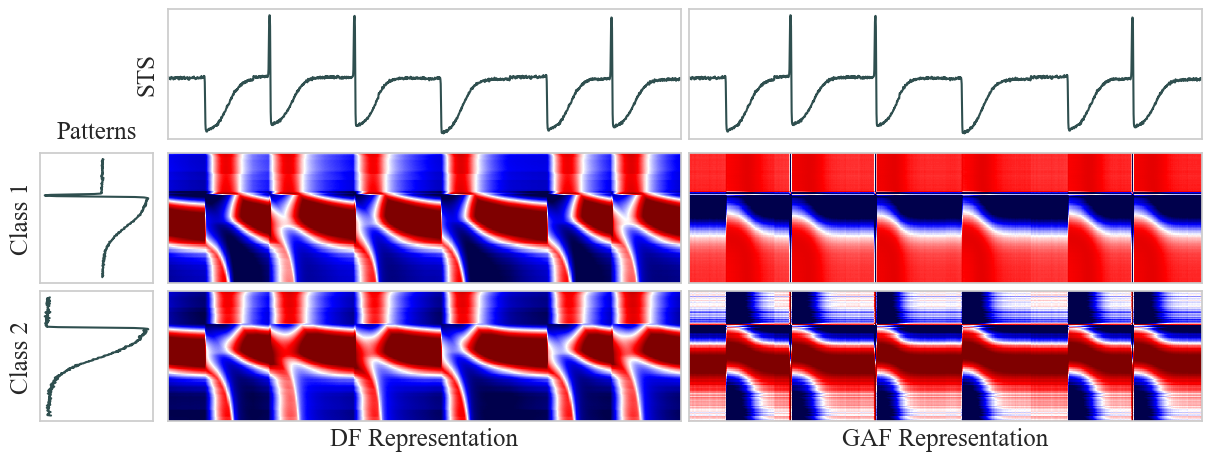

In [8]:
from s3ts.analysis import encoding_plot

for dset in ["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"]:
    encoding_plot(dset)